In [1]:
##Import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Set the figure size standard
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)

In [2]:
##Get the dataset and show the top 5 rows
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Data Exploratory
* Gathering some general information about my dataset

In [3]:
##Check the shape
data.shape

(48895, 16)

In [4]:
##Check the numerical features some extended and deeper information
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
##Checking for missing values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
##Checking for general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Data Wrangling Process

In [7]:
##Deleting the columns that i think will not play a role in my analysis
data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'calculated_host_listings_count'], axis = 1, inplace = True)

In [8]:
##Check the shape again to see if the columns dropped
data.shape

(48895, 9)

In [9]:
##Getting the columns with missing values
missing_values = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

for feature in missing_values:
    print('{}: {}% missing values'.format(feature, np.round(data[feature].isnull().mean(), 4)))

last_review: 0.2056% missing values
reviews_per_month: 0.2056% missing values


In [10]:
##From missing values getting the categorical feature
categorical_nan = [feature for feature in missing_values if data[feature].dtype == 'O']
for feature in categorical_nan:
    print('{}: {}% missing values'.format(feature, np.round(data[feature].isnull().mean(), 4)))

last_review: 0.2056% missing values


In [11]:
##Fill the missig values with mode method
data['last_review'].fillna(data['last_review'].mode()[0], inplace = True)

In [12]:
##Getting the numerical feature which has NaN values
numerical_nan = [feature for feature in missing_values if data[feature].dtype != 'O']
for feature in numerical_nan:
    print('{}: {}% missing values'.format(feature, np.round(data[feature].isnull().mean(), 4)))

reviews_per_month: 0.2056% missing values


In [13]:
##Fill the missing values with median
data['reviews_per_month'].fillna(data['reviews_per_month'].median(), inplace = True)

In [14]:
##Check for NaN values again
data.isnull().sum().sum()

0

In [15]:
##Converting 'last_review' column from object to datetime
data['last_review'] = pd.to_datetime(data['last_review'])

In [16]:
##Getting the year, month and day
data['last_review_year'] = data['last_review'].apply(lambda x: x.year)
data['last_review_month'] = data['last_review'].apply(lambda x: x.month)
data['last_review_day'] = data['last_review'].apply(lambda x: x.day)

In [17]:
data.drop('last_review', axis = 1, inplace = True)
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day
0,Brooklyn,Kensington,Private room,149,1,9,0.21,365,2018,10,19
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355,2019,5,21
2,Manhattan,Harlem,Private room,150,3,0,0.72,365,2019,6,23
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194,2019,7,5
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0,2018,11,19


#### Data Visualization & Exploratory
Numerical Feature:
* Discrete & Continues Feature

In [18]:
##Getting all numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
data[numerical_feature].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day
0,149,1,9,0.21,365,2018,10,19
1,225,1,45,0.38,355,2019,5,21
2,150,3,0,0.72,365,2019,6,23
3,89,1,270,4.64,194,2019,7,5
4,80,10,9,0.10,0,2018,11,19


In [19]:
##Checking for discrete feature
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25 and feature not in ['price']
                   and feature not in ['last_review_year', 'last_review_month', 'last_review_day']]
discrete_feature

[]

In [20]:
##Checking for continues feature
continues_feature = [feature for feature in numerical_feature if feature not in discrete_feature and feature not in ['last_review_year', 'last_review_month', 'last_review_day']]
list(continues_feature)

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

* Univariate Plot

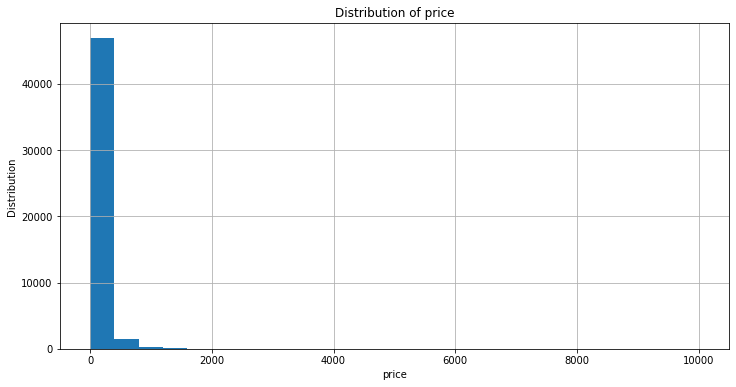

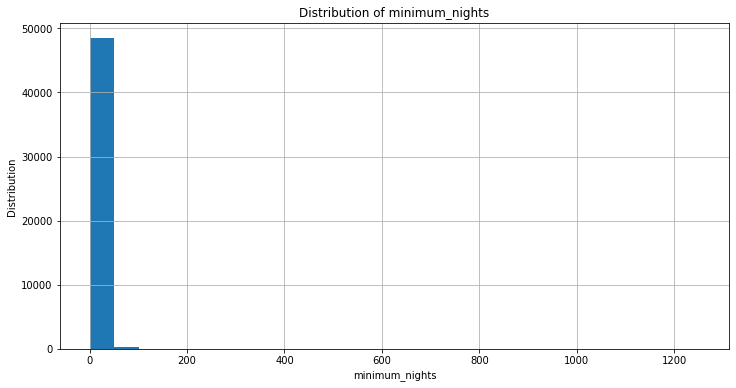

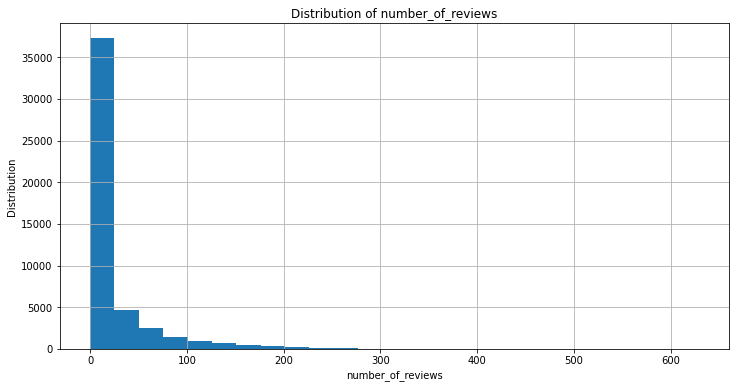

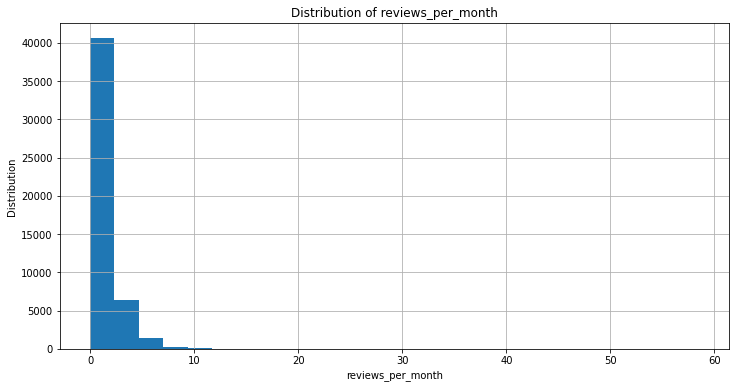

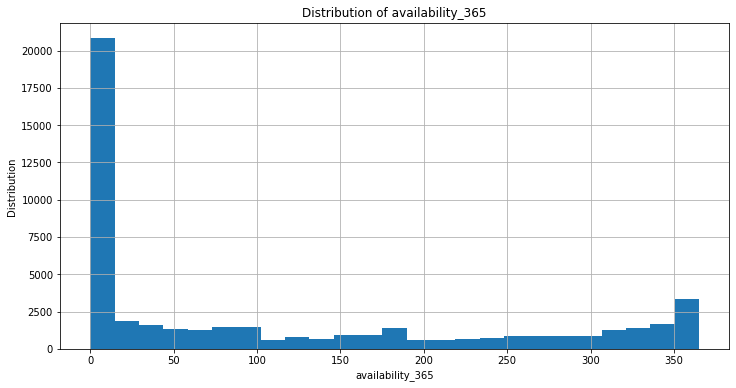

In [21]:
for feature in continues_feature:
    df = data.copy()
    df[feature].hist(bins = 25)
    plt.title('Distribution of '+feature)
    plt.xlabel(feature)
    plt.ylabel('Distribution')
    plt.show()

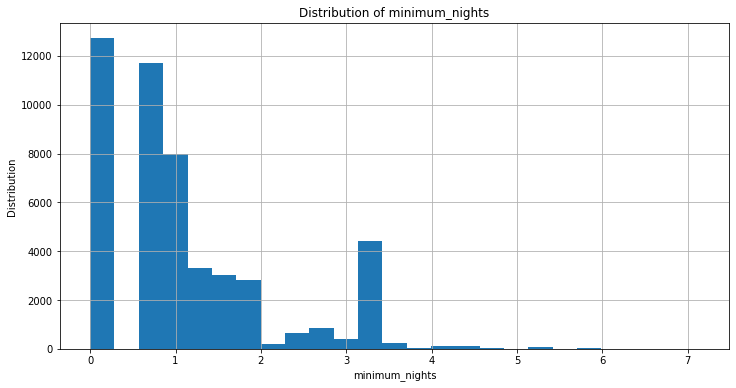

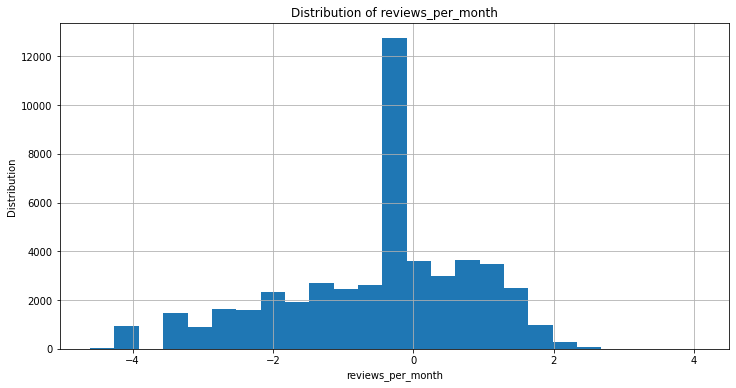

In [22]:
##Because the distributions are skewed to the right let's check the log transform
for feature in continues_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df[feature].hist(bins = 25)
        plt.title('Distribution of '+feature)
        plt.xlabel(feature)
        plt.ylabel('Distribution')
        plt.show()

Categorical Features

In [23]:
##Getting the categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
data[categorical_feature].head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


* Bivariate Plot

In [24]:
##Just to have an idea which neaighbourhood is more expensive 
##and because there are a ot i put a threshhold to keep just the first 25
top_25 = data['neighbourhood'].value_counts()
top_25 = top_25[:25].index

In [25]:
new_df = data[data['neighbourhood'].isin(top_25)]

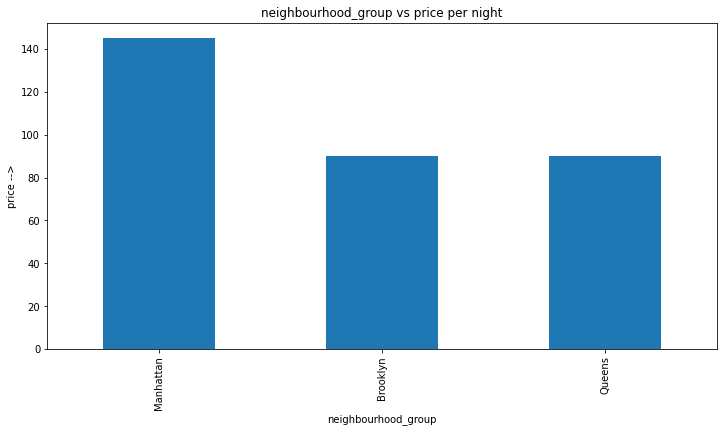

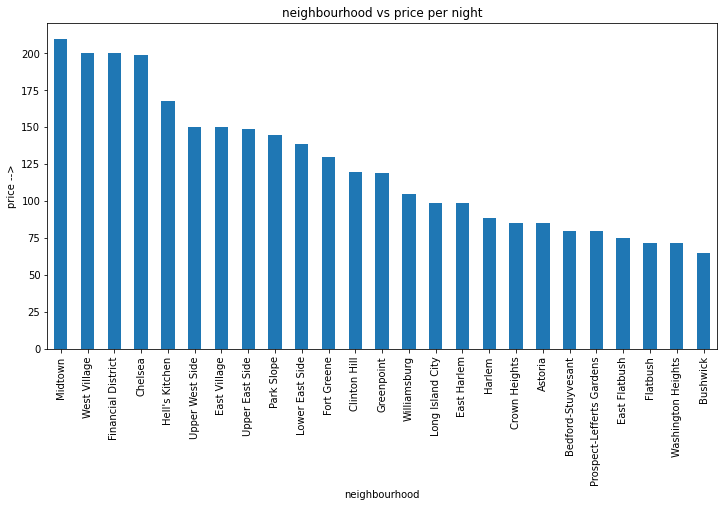

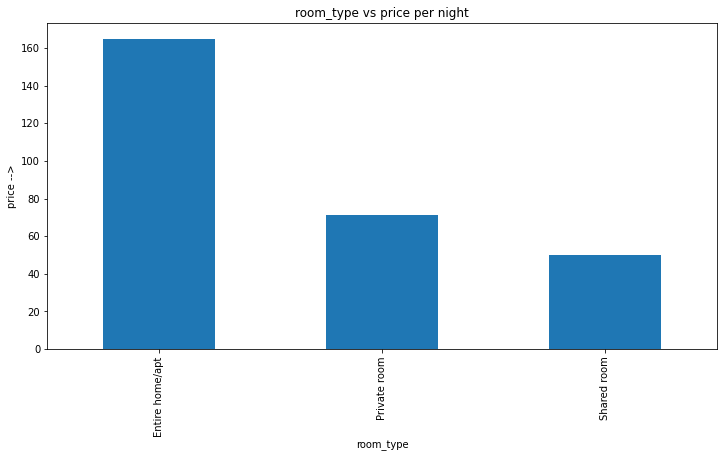

In [26]:
for feature in categorical_feature:
    df = new_df.copy()
    df.groupby(feature)['price'].median().sort_values(ascending = False).plot(kind = 'bar')
    plt.title(feature+' vs price per night')
    plt.xlabel(feature)
    plt.ylabel('price -->')
    plt.xticks(rotation = 90)
    plt.show()

In [27]:
##Check the shape because i will clean some records
data.shape

(48895, 11)

In [28]:
##I will suppose that there is no price less than $5 per night in NY
data = data[~(data['price'] < 5)]

In [29]:
##Check again the shape of dataset if there is any records deleted
data.shape

(48884, 11)

<AxesSubplot:>

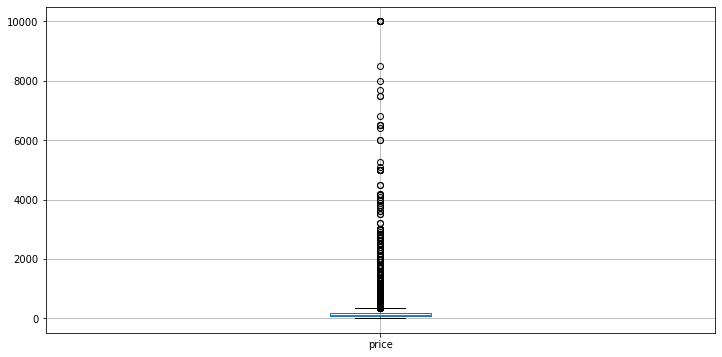

In [30]:
##To check for outliers there is too many ways but i prefer the boxplot
data.boxplot(column = 'price')

* Remove outliers

In [31]:
##Calculate the first & third quartile or '25% & 75%'
q1, q3 = np.percentile(data['price'], [25,75])
print('First quartile:', q1, '<--->', 'Third quartile:',q3)

First quartile: 69.0 <---> Third quartile: 175.0


In [32]:
##Calculate the interquantile range or iqr
iqr = q3 - q1
print('Interquartile range:', iqr)

Interquartile range: 106.0


In [33]:
##Calculate the lower and upper level
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
print('Lower:',lower, '<--->', 'Upper:', upper)

Lower: -90.0 <---> Upper: 334.0


In [34]:
##From the boxplot i can see that there is not less than my lower level and there is some values more than upper level
## But i will doublecheck to make sure
data[data['price']<lower]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day


In [35]:
##Check for values which exceed the upper level but * this will be only for one night because if the price 
##is more than my upper level and the number of nights spent is more than 1 makes sense
data = data[~((data['price']>upper) & (data['minimum_nights'] == 1))]

In [36]:
##Check the shape again
data.shape

(48231, 11)

<AxesSubplot:>

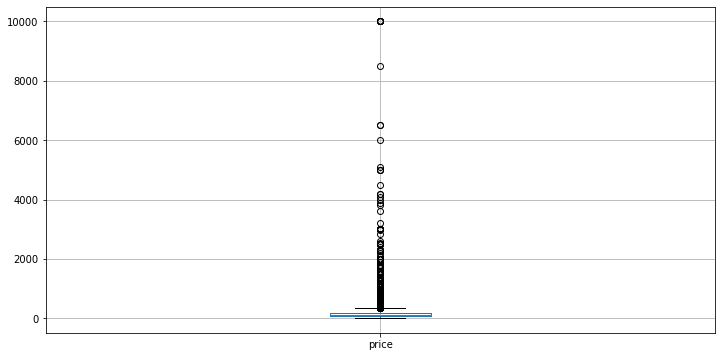

In [37]:
##Check the boxplot again
data.boxplot(column='price')

There is still outliers showing but this may vary for number of nights spent

In [38]:
##Check the top 5 rows
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day
0,Brooklyn,Kensington,Private room,149,1,9,0.21,365,2018,10,19
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355,2019,5,21
2,Manhattan,Harlem,Private room,150,3,0,0.72,365,2019,6,23
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194,2019,7,5
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0,2018,11,19


In [39]:
##Because in neighbourhood column there is too many features and i have the city i will delete that column
data.drop('neighbourhood', axis = 1, inplace = True)

In [40]:
data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day
0,Brooklyn,Private room,149,1,9,0.21,365,2018,10,19
1,Manhattan,Entire home/apt,225,1,45,0.38,355,2019,5,21
2,Manhattan,Private room,150,3,0,0.72,365,2019,6,23
3,Brooklyn,Entire home/apt,89,1,270,4.64,194,2019,7,5
4,Manhattan,Entire home/apt,80,10,9,0.10,0,2018,11,19


In [41]:
data.neighbourhood_group.value_counts()

Manhattan        21200
Brooklyn         19941
Queens            5633
Bronx             1086
Staten Island      371
Name: neighbourhood_group, dtype: int64

In [42]:
data.room_type.value_counts()

Entire home/apt    24902
Private room       22182
Shared room         1147
Name: room_type, dtype: int64

In [43]:
##Get dummies from categorical feature
data = pd.get_dummies(data, drop_first=True)

In [44]:
data.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,365,2018,10,19,1,0,0,0,1,0
1,225,1,45,0.38,355,2019,5,21,0,1,0,0,0,0
2,150,3,0,0.72,365,2019,6,23,0,1,0,0,1,0
3,89,1,270,4.64,194,2019,7,5,1,0,0,0,0,0
4,80,10,9,0.10,0,2018,11,19,0,1,0,0,0,0


In [45]:
##Let's rename the columns to make more easy to read
data.rename(columns = {'price': 'Price',
                       'number_of_reviews': 'Nr_reviews',
                       'reviews_per_month': 'Reviews_month',
                       'availability_365': 'Availability',
                       'last_review_year': 'Last_review_year',
                       'last_review_month': 'Last_review_month',
                       'last_review_day': 'Last_review_day',
                       'minimum_nights':'Nr_nights',
                       'neighbourhood_group_Brooklyn': 'Brooklyn',
                       'neighbourhood_group_Manhattan': 'Manhattan',
                       'neighbourhood_group_Queens': 'Queens',
                       'neighbourhood_group_Staten Island': 'Staten_Island',
                       'room_type_Private room': 'Private_room',
                       'room_type_Shared room': 'Shared_room'}, inplace = True)

In [46]:
data.head()

,Price,Nr_nights,Nr_reviews,Reviews_month,Availability,Last_review_year,Last_review_month,Last_review_day,Brooklyn,Manhattan,Queens,Staten_Island,Private_room,Shared_room
0,149,1,9,0.21,365,2018,10,19,1,0,0,0,1,0
1,225,1,45,0.38,355,2019,5,21,0,1,0,0,0,0
2,150,3,0,0.72,365,2019,6,23,0,1,0,0,1,0
3,89,1,270,4.64,194,2019,7,5,1,0,0,0,0,0
4,80,10,9,0.10,0,2018,11,19,0,1,0,0,0,0


* Feature Scaling

In [47]:
##Select the feature for scale
feature_scaler = [feature for feature in data.columns if feature not in ['Price']]
data[feature_scaler].head()

,Nr_nights,Nr_reviews,Reviews_month,Availability,Last_review_year,Last_review_month,Last_review_day,Brooklyn,Manhattan,Queens,Staten_Island,Private_room,Shared_room
0,1,9,0.21,365,2018,10,19,1,0,0,0,1,0
1,1,45,0.38,355,2019,5,21,0,1,0,0,0,0
2,3,0,0.72,365,2019,6,23,0,1,0,0,1,0
3,1,270,4.64,194,2019,7,5,1,0,0,0,0,0
4,10,9,0.10,0,2018,11,19,0,1,0,0,0,0


In [48]:
##Import the library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[feature_scaler])

MinMaxScaler()

In [49]:
##See the transform after scaling
scaler.transform(data[feature_scaler])

array([[0.        , 0.01430843, 0.00341939, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.07154213, 0.00632587, ..., 0.        , 0.        ,
        0.        ],
       [0.00160128, 0.        , 0.01213883, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00720576, 0.        , 0.01213883, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01213883, ..., 0.        , 0.        ,
        1.        ],
       [0.00480384, 0.        , 0.01213883, ..., 0.        , 1.        ,
        0.        ]])

In [50]:
##Creating a new dataframe duplicate the old one data
data = pd.concat([data['Price'].reset_index(drop = True), pd.DataFrame(scaler.transform(data[feature_scaler]),
                columns = feature_scaler)], axis = 1)

In [51]:
##Check the head
data.head()

,Price,Nr_nights,Nr_reviews,Reviews_month,Availability,Last_review_year,Last_review_month,Last_review_day,Brooklyn,Manhattan,Queens,Staten_Island,Private_room,Shared_room
0,149,0.000000,0.014308,0.003419,1.000000,0.875,0.818182,0.600000,1.0,0.0,0.0,0.0,1.0,0.0
1,225,0.000000,0.071542,0.006326,0.972603,1.000,0.363636,0.666667,0.0,1.0,0.0,0.0,0.0,0.0
2,150,0.001601,0.000000,0.012139,1.000000,1.000,0.454545,0.733333,0.0,1.0,0.0,0.0,1.0,0.0
3,89,0.000000,0.429253,0.079159,0.531507,1.000,0.545455,0.133333,1.0,0.0,0.0,0.0,0.0,0.0
4,80,0.007206,0.014308,0.001539,0.000000,0.875,0.909091,0.600000,0.0,1.0,0.0,0.0,0.0,0.0


#### Create the Model

In [52]:
## First create X and y dataframe
X = data.drop('Price', axis = 1)
y = data['Price']

In [53]:
##Import libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

In [54]:
##Split in train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
##Fit the model
random = RandomForestRegressor()
random.fit(X, y)
prediction = random.predict(X_test)

In [56]:
print('Random Score:', r2_score(y_test, prediction))
print('Random Error:', mean_squared_error(y_test, prediction))

Random Score: 0.7756651538725875
Random Error: 8638.354206261982


* Model Optimization

In [57]:
n_estimators = [100, 300, 500, 700, 1000]
max_features = ['auto', 'sqrt']

In [58]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

In [59]:
rf_random = RandomizedSearchCV(estimator=random, param_distributions=random_grid, scoring='neg_mean_squared_error',
                  n_iter=10, cv = 5, verbose = 2, n_jobs=1, random_state=42)

In [60]:
#rf_random.fit(X_train, y_train)

In [61]:
#rf_random.best_estimator_

In [62]:
#rf_prediction = rf_random.predict(X_test)

In [63]:
'''random_opt = RandomForestRegressor(n_estimators=1000, max_features='sqrt')
random_opt.fit(X, y)
pred = random_opt.predict(X_test)'''

"random_opt = RandomForestRegressor(n_estimators=1000, max_features='sqrt')\nrandom_opt.fit(X, y)\npred = random_opt.predict(X_test)"

In [64]:
#print('Random Score:', r2_score(y_test, pred))
#print('Random Error:', mean_squared_error(y_test, pred))

In [67]:
'''##Dump with pickle
import pickle
file = open('model.pkl', 'wb')
pickle.dump(random, file)'''

In [66]:
X.head()

,Nr_nights,Nr_reviews,Reviews_month,Availability,Last_review_year,Last_review_month,Last_review_day,Brooklyn,Manhattan,Queens,Staten_Island,Private_room,Shared_room
0,0.000000,0.014308,0.003419,1.000000,0.875,0.818182,0.600000,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.071542,0.006326,0.972603,1.000,0.363636,0.666667,0.0,1.0,0.0,0.0,0.0,0.0
2,0.001601,0.000000,0.012139,1.000000,1.000,0.454545,0.733333,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.429253,0.079159,0.531507,1.000,0.545455,0.133333,1.0,0.0,0.0,0.0,0.0,0.0
4,0.007206,0.014308,0.001539,0.000000,0.875,0.909091,0.600000,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
import joblib
joblib.dump(random,  'model.pkl',compress=3)

['model2.pkl']